$$ ITI \space AI-Pro: \space Intake \space 45 $$
$$ Recommender \space Systems $$
$$ Lab \space no. \space 4 $$

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

[link text](https://)# Check if GPU is available and set device accordingly


In [35]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import utils
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## 1. Tensors - The Fundamental Data Structure in PyTorch

# Creating tensors


In [3]:
# From Python lists
l = [1,4,5,6,5]
tensorFromList = torch.tensor(l)
# From NumPy arrays
np_data = np.arange(6).reshape((2, 3))
tensorFromNp = torch.from_numpy(np_data)
# Tensor with specific data type (float32, float64)
tensorWithDtype = torch.FloatTensor(l)
# Creating tensors with specific shapes
ones_ = torch.ones([2, 3])

print(tensorFromList,tensorFromNp, tensorWithDtype, ones_, sep='\n\n')

tensor([1, 4, 5, 6, 5])

tensor([[0, 1, 2],
        [3, 4, 5]])

tensor([1., 4., 5., 6., 5.])

tensor([[1., 1., 1.],
        [1., 1., 1.]])


# Tensor operations


In [4]:
# Adding, multiplication
print(tensorFromNp+ones_)
# Reshaping tensors
print(ones_.reshape((3,2)))
# Moving tensors to GPU if available
ones_.to(device='cuda')

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')

## 2. Autograd - Automatic Differentiation

In [5]:
# Creating tensors with gradient tracking
tens = torch.randn(4, 4, requires_grad=True)
# Computing gradients
y = torch.mean(5*(tens**2)* 2*tens)
y.backward()
print('1st time: \n', tens.grad)
# Example of gradient accumulation and zeroing
# Gradient will accumulate if we don't zero it
y = torch.mean(5*(tens**2)* 2*tens)
y.backward()
print('2nd time: \n', tens.grad)

# Zero the gradient and compute again

tens.grad.zero_()
y = torch.mean(5*(tens**2)* 2*tens)
y.backward()
print('2nd time: \n', tens.grad)

1st time: 
 tensor([[0.2440, 8.3029, 0.3788, 0.1274],
        [1.4424, 4.6351, 4.2579, 2.4185],
        [1.9354, 1.5084, 0.0661, 0.3867],
        [3.6909, 1.5146, 0.4569, 0.1608]])
2nd time: 
 tensor([[ 0.4879, 16.6059,  0.7575,  0.2547],
        [ 2.8849,  9.2703,  8.5159,  4.8371],
        [ 3.8709,  3.0168,  0.1321,  0.7733],
        [ 7.3818,  3.0292,  0.9138,  0.3215]])
2nd time: 
 tensor([[0.2440, 8.3029, 0.3788, 0.1274],
        [1.4424, 4.6351, 4.2579, 2.4185],
        [1.9354, 1.5084, 0.0661, 0.3867],
        [3.6909, 1.5146, 0.4569, 0.1608]])


## 3. Neural Networks with nn.Module


In [6]:
# Define a simple neural network
class simple(nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(simple, self).__init__()
        self.hidden = nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

# Create a model instance
model = simple(2, 5, 1)

# Random input
random_input = torch.randn(5,2)

# Forward pass
output = model(random_input)
print('model output: ', output)
# Access model parameters, print them
print("\n\nModel Parameters:")
for name, param in model.named_parameters():
    print(name, param.data)


model output:  tensor([[-0.0031],
        [-0.0699],
        [-0.4150],
        [-0.0254],
        [-0.4238]], grad_fn=<AddmmBackward0>)


Model Parameters:
hidden.weight tensor([[-0.5509, -0.4520],
        [-0.5019,  0.0855],
        [-0.3386, -0.1349],
        [-0.1345, -0.3606],
        [-0.5210, -0.2661]])
hidden.bias tensor([ 0.6642, -0.4566, -0.2670, -0.4929, -0.2146])
predict.weight tensor([[-0.4221, -0.1074,  0.1886,  0.3502, -0.2147]])
predict.bias tensor([-0.0031])


## 4. Loss Functions and Optimizers


In [7]:
# Create some dummy data
x = torch.randn(5, 3)
y = torch.randint(1, 10, (5, 1))

# Create a model
class simple2(nn.Module):
    def __init__(self):
        super(simple2, self).__init__()
        self.hidden = nn.Linear(3, 5)
        self.predict = nn.Linear(5, 1)

    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

model = simple2()
# Define loss function and optimizer
loss = lambda pred, tru: ((pred-tru)**2).mean()
opt = torch.optim.Adam(model.parameters(), lr= 0.1)
# Train for 5 epochs
for epoch in range(5):
    opt.zero_grad()
    output = model(x)
    lss = loss(output, y)
    lss.backward()
    opt.step()
    print(f"Epoch {epoch+1}, Loss: {lss.item()}")

Epoch 1, Loss: 31.205760955810547
Epoch 2, Loss: 26.655147552490234
Epoch 3, Loss: 21.683076858520508
Epoch 4, Loss: 16.379974365234375
Epoch 5, Loss: 11.218669891357422


## 5. Datasets and DataLoaders


100%|██████████| 9.91M/9.91M [00:00<00:00, 16.1MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 478kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.44MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.74MB/s]


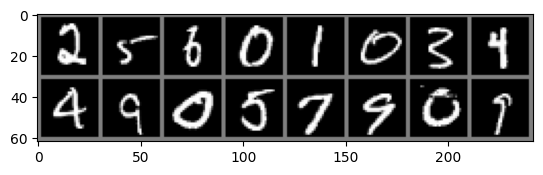

In [8]:
# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])
# Load MNIST dataset
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

# Create DataLoaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers = 2)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers = 2)

# Visualize a batch of data
images, labels = next(iter(train_loader))

# Function to display images
def imshow(img):
    img = (img+1) / 2
    img_npied = img.numpy()
    plt.imshow(np.transpose(img_npied, (1, 2, 0)), cmap="gray")
    plt.show()

# Display a batch of images
# for img in images[:16]:
#     imshow(img)
imshow(utils.make_grid(images[:16]))


## 6. Convolutional Neural Networks (CNNs)


In [11]:
# Define a CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.con1 = nn.Conv2d(1, 32, kernel_size=3)   # 26x26
        self.con2 = nn.Conv2d(32, 64, kernel_size=3)  # 24x24
        self.mp = nn.MaxPool2d(2)
        self.fc = nn.Linear(64*5*5, 10)

    def forward(self, x):
        in_size = x.size(0)
        x = self.mp(torch.relu(self.con1(x)))
        x = self.mp(torch.relu(self.con2(x)))
        x = x.view(in_size, -1)
        x = self.fc(x)

        return x

# Create a CNN model
model = CNN()

## 7. Training a CNN on MNIST


In [12]:
# Move model to device (GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Define loss function and optimizer
lossfn = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(), lr = 0.001)
# Train function
def train(model, train_loader, lossfn, optimizer, device, epochs= 7):
    model.train()
    for epoch in range(epochs):
        cum_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = lossfn(outputs, labels)
            loss.backward()
            optimizer.step()

            cum_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {cum_loss/len(train_loader):.4f}")


train(model, train_loader, lossfn, opt, device)

Epoch 1, Loss: 0.1333
Epoch 2, Loss: 0.0478
Epoch 3, Loss: 0.0342
Epoch 4, Loss: 0.0261
Epoch 5, Loss: 0.0212
Epoch 6, Loss: 0.0166
Epoch 7, Loss: 0.0132


## 8. Evaluating the Model


In [13]:
def evaluate(model, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

evaluate(model, test_loader, device)

Test Accuracy: 98.97%


## 9. Saving and Loading Models


In [14]:
# Save model
torch.save(model.state_dict(), 'model_params.pkl')

# Load model
model_loaded = torch.load('model_params.pkl')


## 10. Transfer Learning


In [20]:
# Define a new model based on a pre-trained network
class TransferLearningModel(nn.Module):
    def __init__(self):
        super(TransferLearningModel, self).__init__()
        self.model = models.resnet18(pretrained=True)

        self.model.conv1 = nn.Conv2d(1, 64, kernel_size=3, bias=True)

        for param in self.model.parameters():
            param.requires_grad = False


        num_features = self.model.fc.in_features
        self.model.fc = nn.Linear(num_features, 10)

    def forward(self, x):
        return self.model(x)

# Create transfer learning model
Tmodel = TransferLearningModel().to(device)
optT = torch.optim.Adam(Tmodel.parameters(), lr= 0.001)

train(Tmodel, train_loader, lossfn, optT, device)

evaluate(Tmodel, test_loader, device)

Epoch 1, Loss: 0.7505
Epoch 2, Loss: 0.6040
Epoch 3, Loss: 0.5855
Epoch 4, Loss: 0.5866
Epoch 5, Loss: 0.5783
Epoch 6, Loss: 0.5764
Epoch 7, Loss: 0.5733
Test Accuracy: 84.29%


## 11. Advanced Techniques: Learning Rate Scheduler


In [32]:
# Define a learning rate scheduler
Tmodel5 = TransferLearningModel().to(device)
optT = torch.optim.Adam(Tmodel5.parameters(), lr= 0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optT, step_size=5, gamma=0.5)

# Simulate training for 15 epochs
def train(model, train_loader, lossfn, optimizer, device, epochs= 15):
    model.train()

    for epoch in range(epochs):
        cum_loss = 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = lossfn(outputs, labels)
            loss.backward()
            optimizer.step()

            cum_loss += loss.item()
        scheduler.step()
        current_lr = scheduler.get_last_lr()[0]
        print(f"Epoch {epoch+1}, Loss: {cum_loss/len(train_loader):.4f}, lr: {current_lr:.6f}")

train(Tmodel5, train_loader, lossfn, optT, device, epochs = 15)
evaluate(Tmodel5, test_loader, device)

Epoch 1, Loss: 0.7863, lr: 0.001000
Epoch 2, Loss: 0.6369, lr: 0.001000
Epoch 3, Loss: 0.6193, lr: 0.001000
Epoch 4, Loss: 0.6148, lr: 0.001000
Epoch 5, Loss: 0.6088, lr: 0.000500
Epoch 6, Loss: 0.5822, lr: 0.000500
Epoch 7, Loss: 0.5760, lr: 0.000500
Epoch 8, Loss: 0.5776, lr: 0.000500
Epoch 9, Loss: 0.5801, lr: 0.000500
Epoch 10, Loss: 0.5762, lr: 0.000250
Epoch 11, Loss: 0.5633, lr: 0.000250
Epoch 12, Loss: 0.5569, lr: 0.000250
Epoch 13, Loss: 0.5651, lr: 0.000250
Epoch 14, Loss: 0.5583, lr: 0.000250
Epoch 15, Loss: 0.5608, lr: 0.000125
Test Accuracy: 84.47%


## 12. Custom Datasets


In [36]:
class TabularDataset(Dataset):
    def __init__(self, n_samples=100, n_features=5):
        super().__init__()

        self.features = torch.randn(n_samples, n_features)
        self.labels = torch.randint(0, 2, (n_samples,))

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):

        x = self.features[idx]
        y = self.labels[idx]
        return x, y

# Create a simple custom dataset
custom_dataset = TabularDataset(n_samples=100, n_features=5)


----------------------------------------------

$$ Wish \space you \space all \space the \space best \space ♡ $$
$$ Mahmoud \space Shawqi $$